# Task-2

Train a multilayer perceptron on the MNIST dataset using the traditional train/test split as given by mnist.load_data in keras. Use a separate 10000 samples (from the training set) for model selection and to compute learning curves (accuracy vs epochs, not vs n_samples). Compare a “vanilla” model with a model using drop-out. Visualize learning curves for all models. As an estimate, you should expect each model to take less than 30 minutes to train on a CPU.

### MNIST Dataset (Modified National Institute of Standards and Technology database):

It is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

In [23]:
# Importing Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import keras
from keras.models import Sequential
from sklearn.cross_validation import train_test_split
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.grid_search import GridSearchCV
np.random.RandomState(seed=0)

In [25]:
# Importing MNIST dataset

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [29]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [30]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [31]:
# Reshaping train and test data

X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

In [32]:
# checking shape after reshaping

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (60000, 784)
y_train: (60000,)
X_test: (10000, 784)
y_test: (10000,)


We can observe the reshaped data from the above values

In [33]:
num_classes = 10

# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
plt.rcParams["figure.dpi"] = 120
np.set_printoptions(precision=3, suppress=True)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

y_train: (60000, 10)
y_test: (10000, 10)


In [35]:
# Defining the model

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [36]:
# Fitting the model

vanilla = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.5426 - acc: 0.8518 - val_loss: 0.2495 - val_acc: 0.9338
Epoch 2/20
54000/54000 [==============================] - 2s 32us/step - loss: 0.2716 - acc: 0.9240 - val_loss: 0.1974 - val_acc: 0.9477
Epoch 3/20
54000/54000 [==============================] - 2s 32us/step - loss: 0.2244 - acc: 0.9369 - val_loss: 0.1707 - val_acc: 0.9537
Epoch 4/20
54000/54000 [==============================] - 2s 30us/step - loss: 0.1913 - acc: 0.9459 - val_loss: 0.1540 - val_acc: 0.9568
Epoch 5/20
54000/54000 [==============================] - 2s 29us/step - loss: 0.1687 - acc: 0.9519 - val_loss: 0.1434 - val_acc: 0.9592
Epoch 6/20
54000/54000 [==============================] - 2s 29us/step - loss: 0.1527 - acc: 0.9570 - val_loss: 0.1374 - val_acc: 0.9598
Epoch 7/20
54000/54000 [==============================] - 2s 30us/step - loss: 0.1385 - acc: 0.9609 - val_loss: 0.1282 - val_acc:

In [61]:
# Printing the summary of the model

print('\nSummary:')
model.summary()


Summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_95 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_99 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_96 (Activation)   (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [37]:
def make_model_vanilla(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(32, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
    return model

In [38]:
# Fitting the keras classifier in the model

clf_vanilla = KerasClassifier(make_model_vanilla)

In [39]:
param_grid = {'epochs': [1, 5, 10],
              'hidden_size': [32, 64, 256]}

In [40]:
# Gridsearch parameters

grid_vanilla = GridSearchCV(clf_vanilla, param_grid=param_grid, cv=5)
grid_vanilla.fit(X_train, y_train)

Epoch 1/1
12000/12000 [==============================] - 1s 98us/step
Epoch 1/1
12000/12000 [==============================] - 1s 124us/step
Epoch 1/1
12000/12000 [==============================] - 1s 103us/step
Epoch 1/1
12000/12000 [==============================] - 2s 137us/step
Epoch 1/1
12000/12000 [==============================] - 1s 106us/step
Epoch 1/1
12000/12000 [==============================] - 2s 150us/step
Epoch 1/1
12000/12000 [==============================] - 1s 110us/step
Epoch 1/1
12000/12000 [==============================] - 1s 119us/step
Epoch 1/1
12000/12000 [==============================] - 1s 114us/step
Epoch 1/1
12000/12000 [==============================] - 1s 119us/step
Epoch 1/1
12000/12000 [==============================] - 1s 117us/step
Epoch 1/1
12000/12000 [==============================] - 1s 124us/step
Epoch 1/1
12000/12000 [==============================] - 2s 137us/step
Epoch 1/1
12000/12000 [==============================] - 1s 124us/step
Epoch 1

48000/48000 [==============================] - 5s 114us/step - loss: 0.2061 - acc: 0.9401
Epoch 3/5
48000/48000 [==============================] - 6s 130us/step - loss: 0.1623 - acc: 0.9528
Epoch 4/5
48000/48000 [==============================] - 6s 117us/step - loss: 0.1365 - acc: 0.9603
Epoch 5/5
12000/12000 [==============================] - 2s 204us/step
Epoch 1/5
48000/48000 [==============================] - 8s 171us/step - loss: 0.3774 - acc: 0.8947
Epoch 2/5
48000/48000 [==============================] - 6s 132us/step - loss: 0.1970 - acc: 0.9430
Epoch 3/5
48000/48000 [==============================] - 7s 137us/step - loss: 0.1576 - acc: 0.9539
Epoch 4/5
48000/48000 [==============================] - 7s 147us/step - loss: 0.1339 - acc: 0.9601
Epoch 5/5
12000/12000 [==============================] - 2s 148us/step
Epoch 1/5
48000/48000 [==============================] - 9s 185us/step - loss: 0.3803 - acc: 0.8956
Epoch 2/5
48000/48000 [==============================] - 7s 139us/st

48000/48000 [==============================] - 11s 223us/step - loss: 0.3953 - acc: 0.8900
Epoch 2/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.2299 - acc: 0.9337
Epoch 3/10
48000/48000 [==============================] - 7s 143us/step - loss: 0.1813 - acc: 0.9481
Epoch 4/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.1520 - acc: 0.9555
Epoch 5/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.1321 - acc: 0.9618
Epoch 6/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.1154 - acc: 0.9660
Epoch 7/10
48000/48000 [==============================] - 6s 135us/step - loss: 0.1036 - acc: 0.9686
Epoch 8/10
48000/48000 [==============================] - 7s 146us/step - loss: 0.0937 - acc: 0.9711
Epoch 9/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.0854 - acc: 0.9738
Epoch 10/10
12000/12000 [==============================] - 2s 204us/step
Epoch 1/10
48000/48000 [====

48000/48000 [==============================] - 8s 156us/step - loss: 0.0901 - acc: 0.9731
Epoch 8/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.0815 - acc: 0.9756
Epoch 9/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.0752 - acc: 0.9771
Epoch 10/10
12000/12000 [==============================] - 2s 172us/step
Epoch 1/10
48000/48000 [==============================] - 10s 219us/step - loss: 0.3844 - acc: 0.8940
Epoch 2/10
48000/48000 [==============================] - 8s 158us/step - loss: 0.2081 - acc: 0.9404
Epoch 3/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.1618 - acc: 0.9536
Epoch 4/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.1361 - acc: 0.9606
Epoch 5/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.1167 - acc: 0.9653
Epoch 6/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.1026 - acc: 0.9695
Epoch 7/10
48000/48000 [====

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000000F3073C1E48>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
# Printing the best parameter from gridsearch

print(grid_vanilla.best_params_)

{'epochs': 10, 'hidden_size': 256}


In [42]:
# Implementing drop out

from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])


In [43]:
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [44]:
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 50s 934us/step - loss: 0.2984 - acc: 0.9084 - val_loss: 0.0955 - val_acc: 0.9713
Epoch 2/20
54000/54000 [==============================] - 43s 796us/step - loss: 0.1452 - acc: 0.9553 - val_loss: 0.0848 - val_acc: 0.9758
Epoch 3/20
54000/54000 [==============================] - 45s 828us/step - loss: 0.1079 - acc: 0.9666 - val_loss: 0.0695 - val_acc: 0.9792
Epoch 4/20
54000/54000 [==============================] - 43s 800us/step - loss: 0.0935 - acc: 0.9708 - val_loss: 0.0732 - val_acc: 0.9768
Epoch 5/20
54000/54000 [==============================] - 40s 744us/step - loss: 0.0823 - acc: 0.9745 - val_loss: 0.0636 - val_acc: 0.9828
Epoch 6/20
54000/54000 [==============================] - 40s 735us/step - loss: 0.0759 - acc: 0.9763 - val_loss: 0.0680 - val_acc: 0.9805
Epoch 7/20
54000/54000 [==============================] - 40s 741us/step - loss: 0.0684 - acc: 0.9777 - val_loss: 0.0

In [45]:
def make_model_batch(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(32, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
    return model

In [46]:
clf_batch = KerasClassifier(make_model_vanilla)

In [47]:
param_grid = {'epochs': [1, 5, 10],  
              'hidden_size': [32, 64, 256]}
grid_batch = GridSearchCV(clf_batch, param_grid=param_grid, cv=5)
grid_batch.fit(X_train, y_train)

Epoch 1/1
12000/12000 [==============================] - 2s 191us/step
Epoch 1/1
12000/12000 [==============================] - 2s 199us/step
Epoch 1/1
12000/12000 [==============================] - 3s 231us/step
Epoch 1/1
12000/12000 [==============================] - 3s 243us/step
Epoch 1/1
12000/12000 [==============================] - 3s 253us/step
Epoch 1/1
12000/12000 [==============================] - 3s 242us/step
Epoch 1/1
12000/12000 [==============================] - 3s 214us/step
Epoch 1/1
12000/12000 [==============================] - 4s 292us/step
Epoch 1/1
12000/12000 [==============================] - 3s 240us/step
Epoch 1/1
12000/12000 [==============================] - 3s 252us/step
Epoch 1/1
12000/12000 [==============================] - 3s 265us/step
Epoch 1/1
12000/12000 [==============================] - 3s 265us/step
Epoch 1/1
12000/12000 [==============================] - 3s 261us/step
Epoch 1/1
12000/12000 [==============================] - 3s 245us/step
Epoch 

48000/48000 [==============================] - 13s 277us/step - loss: 0.3928 - acc: 0.8902
Epoch 2/5
48000/48000 [==============================] - 10s 202us/step - loss: 0.2123 - acc: 0.9386
Epoch 3/5
48000/48000 [==============================] - 10s 210us/step - loss: 0.1684 - acc: 0.9503
Epoch 4/5
48000/48000 [==============================] - 9s 197us/step - loss: 0.1417 - acc: 0.9571
Epoch 5/5
12000/12000 [==============================] - 4s 300us/step
Epoch 1/5
48000/48000 [==============================] - ETA: 0s - loss: 0.3809 - acc: 0.893 - 14s 285us/step - loss: 0.3810 - acc: 0.8936
Epoch 2/5
48000/48000 [==============================] - 10s 205us/step - loss: 0.2019 - acc: 0.9424
Epoch 3/5
48000/48000 [==============================] - 10s 205us/step - loss: 0.1585 - acc: 0.9550
Epoch 4/5
48000/48000 [==============================] - 10s 210us/step - loss: 0.1313 - acc: 0.9615
Epoch 5/5
12000/12000 [==============================] - 4s 305us/step
Epoch 1/5
48000/48000 [

12000/12000 [==============================] - 4s 365us/step
Epoch 1/10
48000/48000 [==============================] - 17s 347us/step - loss: 0.3976 - acc: 0.8876
Epoch 2/10
48000/48000 [==============================] - 12s 250us/step - loss: 0.2053 - acc: 0.9409
Epoch 3/10
48000/48000 [==============================] - 12s 251us/step - loss: 0.1634 - acc: 0.9519
Epoch 4/10
48000/48000 [==============================] - 12s 240us/step - loss: 0.1372 - acc: 0.95911s - lo
Epoch 5/10
48000/48000 [==============================] - 12s 249us/step - loss: 0.1189 - acc: 0.9652
Epoch 6/10
48000/48000 [==============================] - 12s 242us/step - loss: 0.1064 - acc: 0.9680
Epoch 7/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.0956 - acc: 0.9709
Epoch 8/10
48000/48000 [==============================] - 11s 240us/step - loss: 0.0868 - acc: 0.9740
Epoch 9/10
48000/48000 [==============================] - 11s 222us/step - loss: 0.0795 - acc: 0.9754
Epoch 10/10
12

Epoch 5/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.1206 - acc: 0.9638
Epoch 6/10
48000/48000 [==============================] - 11s 220us/step - loss: 0.1067 - acc: 0.9679
Epoch 7/10
48000/48000 [==============================] - 11s 233us/step - loss: 0.0943 - acc: 0.9715
Epoch 8/10
48000/48000 [==============================] - 11s 229us/step - loss: 0.0862 - acc: 0.9741
Epoch 9/10
48000/48000 [==============================] - 11s 227us/step - loss: 0.0787 - acc: 0.97600s - loss: 0.0787 - acc: 0
Epoch 10/10
12000/12000 [==============================] - 4s 298us/step
Epoch 1/10
48000/48000 [==============================] - 17s 348us/step - loss: 0.3799 - acc: 0.8954
Epoch 2/10
48000/48000 [==============================] - 12s 248us/step - loss: 0.2049 - acc: 0.9417
Epoch 3/10
48000/48000 [==============================] - 12s 244us/step - loss: 0.1577 - acc: 0.9539
Epoch 4/10
48000/48000 [==============================] - 12s 244us/step - loss: 0.12

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000000F325C52E80>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
# Printing the best parameter from gridsearch

print(grid_batch.best_params_)

{'epochs': 10, 'hidden_size': 32}


Text(0,0.5,'loss')

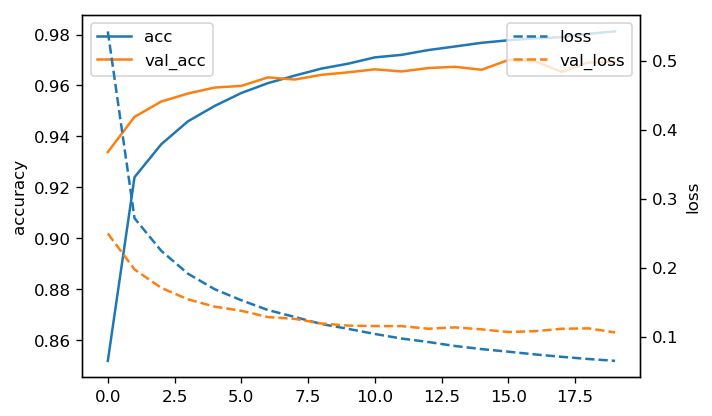

In [48]:
df_vanilla = pd.DataFrame(vanilla.history)
df_vanilla[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df_vanilla[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")


In [49]:
df_dropout = pd.DataFrame(history_dropout.history)

Text(0,0.5,'loss')

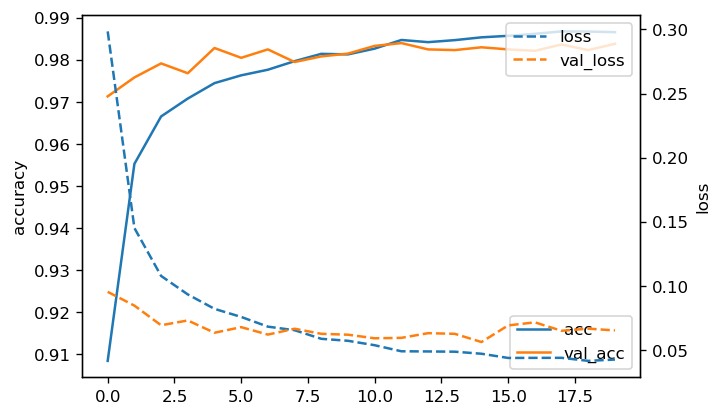

In [50]:
df_dropout[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df_dropout[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [54]:
score_drp = model_dropout.evaluate(X_test, y_test, batch_size=3, verbose=0)

In [55]:

print("\nTest loss for droput: {:.3f}".format(score_drp[0]))
print("Test Accuracy for dropout: {:.3f}".format(score_drp[1]))



Test loss for droput: 0.063
Test Accuracy for dropout: 0.985


In [56]:
score = model.evaluate(X_test, y_test, batch_size=3, verbose=0)

In [57]:
print("\nTest loss for No Dropout: {:.3f}".format(score[0]))
print("Test Accuracy for No Dropout: {:.3f}".format(score[1]))


Test loss for No Dropout: 0.123
Test Accuracy for No Dropout: 0.967


After comparing a “vanilla” model with a model using drop-out I got 98.5 % accuracy and test loss for dropout is 0.063. As we can see from the above score values I got 96.7% accuracy for no dropout. We can consider these accuracies pretty much good as we expected and also from the graph we can observe the differences between using dropout and without dropout which are great.